In [1]:
# No need to install these in Colab, already available
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
from google.colab import files
uploaded = files.upload()  # Upload 'house_prices.csv' when prompted


Saving Housing.csv to Housing.csv


In [3]:
df = pd.read_csv('Housing.csv')  # Change filename if needed


In [4]:
print("📊 Dataset preview:")
print(df.head())

print("\n❓ Missing values in each column:")
print(df.isnull().sum())


📊 Dataset preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

❓ Missing values in each column:
price               0
area                0
be

In [5]:
# Drop rows with missing values (can also use df.fillna() if preferred)
df = df.dropna()


In [7]:
print("📊 Dataset Preview:")
print(df.head())

📊 Dataset Preview:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [8]:
print("\n❓ Missing Values:")
print(df.isnull().sum())


❓ Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
# Step 5: Handle missing values
df = df.dropna()  # Or use df.fillna() for imputation

In [10]:
# Step 6: Select features and target
# Adjust column names based on your CSV structure
if 'GrLivArea' in df.columns and 'SalePrice' in df.columns:
    features = ['GrLivArea']
    target = 'SalePrice'
elif 'area' in df.columns and 'price' in df.columns:
    features = ['area']
    target = 'price'
else:
    raise ValueError("Expected columns like 'GrLivArea' & 'SalePrice' or 'area' & 'price' not found.")

X = df[features]
y = df[target]

In [11]:
# Step 7: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Step 8: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 9: Predict
y_pred = model.predict(X_test)

In [14]:
# Step 10: Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n✅ Model Evaluation:")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")



✅ Model Evaluation:
RMSE: 1917103.7021424233
R² Score: 0.27287851871974644


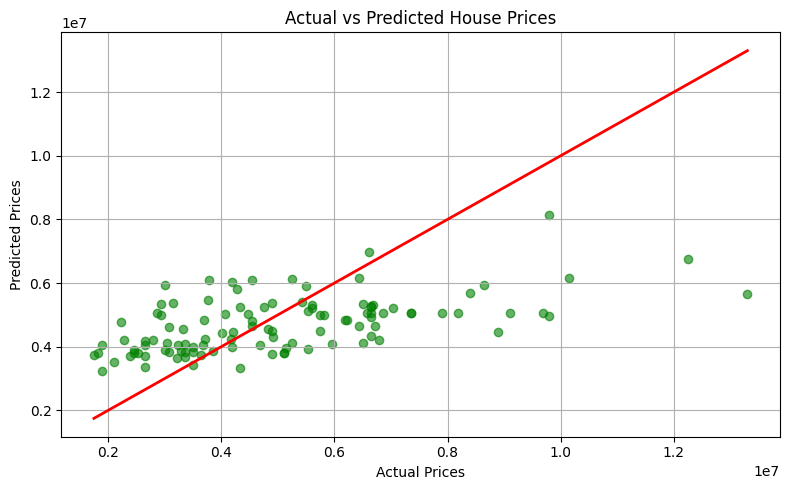

In [15]:
# Step 11: Plot actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.grid(True)
plt.tight_layout()
plt.show()

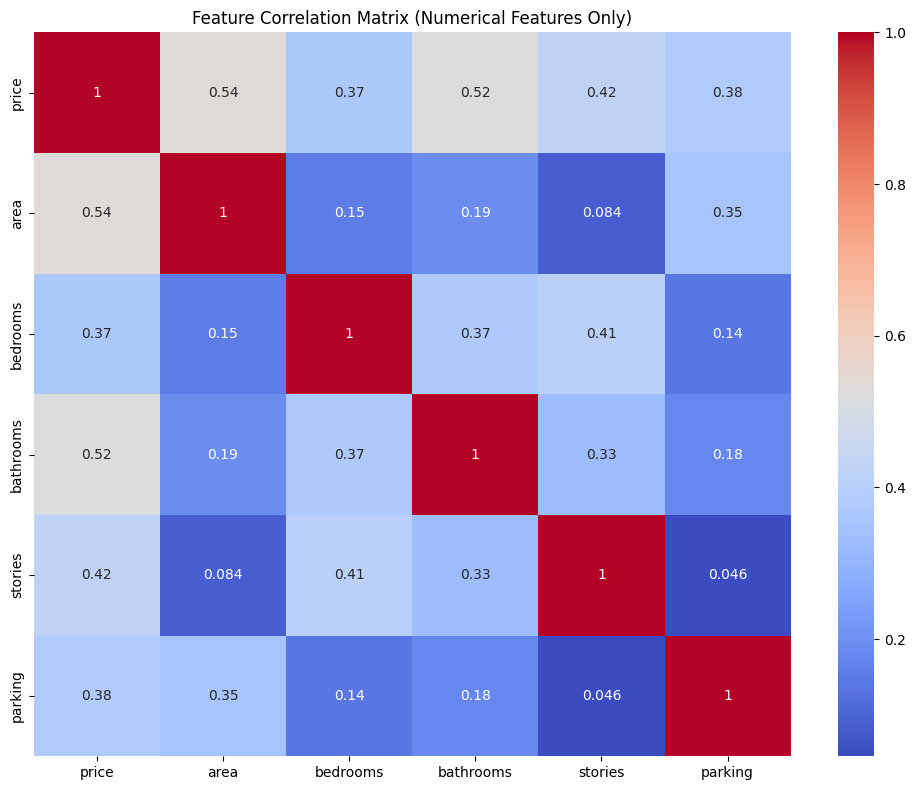

In [18]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix (Numerical Features Only)")
plt.tight_layout()
plt.show()